In [1]:
%run jupyterutils.py

from linear_regression.LinearRegression import LinearRegression

### Linear Regression with multiple feature
We attempt to try and mimic linear regression and than test it , to test our implementations correctness we would generate the data set using a perfect linear equation , we will than compare how good our algorithm does when it get's data fitting a curve whose mathematically model is known. Run time and correctness might be good KPI for monitoring .



##### Create data

We'll check how good is the algorithm in finding the actual parameters when we feed it absolutely ideal data

In [2]:
x1 = sp.Symbol('x1')
x2 = sp.Symbol('x2')
y = 9.8 * x1 + 3.2*x2 + 7.6
print("y = ", end='')
sp.pprint(y)


y = 9.8⋅x₁ + 3.2⋅x₂ + 7.6


In [3]:
def ModelEquation(x1,x2):
    return 9.8*x1 + 3.2*x2 + 7.6

In [4]:
total_data_points = 50000
rng = np.random.default_rng(0)             # reproducible
x1 = rng.uniform(0, 2, total_data_points)  # U(0,2)
x2 = rng.uniform(0, 2, total_data_points)  # completely separate draw
y = ModelEquation(x1,x2)

# perm = np.random.permutation(len(x1))
# x1 = x1[perm]
# x2 = x2[perm]
# y = y[perm]


##### Split data

We're going to split the data into training and testing data based on a tuneable parameter

In [5]:
training_percent = 0.85
training_numbers = int(training_percent*total_data_points)

training_features = np.array([x1[:training_numbers],x2[:training_numbers]]).T
training_labels = np.array(y[:training_numbers])

testing_attributes=np.array([x1[training_numbers:],x2[training_numbers:]]).T
testing_labels=np.array(y[training_numbers:])

print(training_features.shape)
print(testing_attributes.shape)
print(training_labels.shape)
print(testing_labels.shape)

(42500, 2)
(7500, 2)
(42500,)
(7500,)


##### Model Training

Iteration  0  weights  [[0.75129895]
 [0.05072386]]  bias  0.00396477490592254 loss 423.3977773546005


Iteration  1000  weights  [[4.16207557]
 [3.06707412]]  bias  2.9314326076048656 loss 119.99136359896995
Iteration  2000  weights  [[6.0212384 ]
 [4.56372602]]  bias  4.479786925952729 loss 36.19877503423692
Iteration  3000  weights  [[7.06225165]
 [5.26900956]]  bias  5.305008148089213 loss 12.793290701765008
Iteration  4000  weights  [[7.66987421]
 [5.56434389]]  bias  5.7509277632387805 loss 6.024965302972099
Iteration  5000  weights  [[8.04607373]
 [5.64933933]]  bias  5.997767378646111 loss 3.8687958036746917
Iteration  6000  weights  [[8.29699015]
 [5.62833256]]  bias  6.13999398618647 loss 3.0160790319429527
Iteration  7000  weights  [[8.47851809]
 [5.55574198]]  bias  6.227127028693763 loss 2.553321425746751
Iteration  8000  weights  [[8.62019953]
 [5.45983905]]  bias  6.285127020632839 loss 2.225611165208877
Iteration  9000  weights  [[8.73774803]
 [5.35520665]]  bias  6.327606183599637 loss 1.9594566400539568
Iteration  10000  weights  [[8.83961422]
 [5.24926805]]  bias  6.36

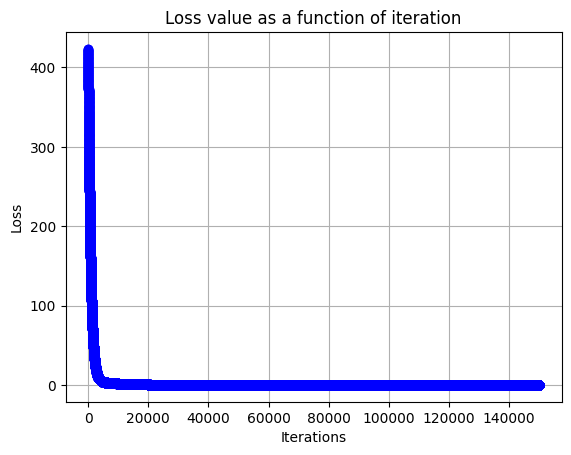

In [6]:
model = LinearRegression(training_features, training_labels.T , learning_rate=0.0001)
model.train(150000,True)

values = model.trainingLoss
x = np.arange(1, len(values) + 1)

plotLineGraph("Iterations", "Loss", "Loss value as a function of iteration",x,values)



#### Prediction Details

In [7]:
print("Predicted weights ", model.weight, " bias ", model.bias)

actual     = testing_labels            # full y-vector, shape (n_samples,)
predicted  = model.predict(testing_attributes)
loss       = model.calculateMseLoss(actual, predicted)

print("Prediction loss", model.calculateMseLoss(actual,model.predict(testing_attributes)))

Predicted weights  [[9.83134679]
 [3.23140821]]  bias  7.530076075061602
Prediction loss 0.0007220230364196015
